# Evaluation of the BDT
Using ROOT files directly to make sure the framework implementation is working correctly.

In [16]:
import numpy as np
import pandas as pd
import uproot as up
import boost_histogram as bh
import hist
from hist import Hist
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
hep.style.use(hep.style.ROOT)

Now lets print the region counts just so we can see more easily any actual difference.

In [17]:
regions = {
    'sr1': 1, # signal region 1
    'sr2': 2, # signal region 2
    'k2pi': 3, # K2pi background region
    'kmu2': 4, # Kmu2 background region
    'k3pi': 5, # k3pi background region
    'ups': 6, # upstream backgroun region (-ve mm2)
    'cr1': 10,
    'cr2': 20,
    'crmu': 30,
    'crmu1': 31,
    'crmu2': 32,
    'cr3pi': 40,
    'cr3d': 50,
}

In [18]:
h = {}
with up.open("./data/NewFW/Kpinn_Run12_11_noov_Kaon7.root:PNNAnalysis") as f:
    for k in f.keys():
        h[k.replace(";1","")] = f[k].to_hist()

In [4]:
h.keys()

dict_keys(['TPNN_I_vs_p', 'signal_mm2_v_p', 'signal_region', 'signalxgb_mm2_v_p', 'signalxgb_region', 'sampleC_mm2_v_p', 'sampleC_region', 'sampleCxgb_mm2_v_p', 'sampleCxgb_region', 'Ups1_mm2_v_p', 'Ups1_region', 'Ups5_mm2_v_p', 'Ups5_region', 'Ups7_mm2_v_p', 'Ups7_region', 'h_NMC_KdecZ_', 'pi_Kdaughter_mm2_vs_p_', 'h_MC_Kdaughter_p_vs_Zprod_', 'h_MC_Kdaughter_mm2_vs_Zprod_', 'h_MC_Kdaughter_mm2_vs_p_KinFV_'])

In [4]:
h["sampleC_region"].values()[regions['sr1']] + h["sampleC_region"].values()[regions['sr2']]

38.0

In [6]:
h["sampleC_region"].values().sum()

2328.0

In [5]:
h["sampleCxgb_region"].values()[regions['sr1']] + h["sampleCxgb_region"].values()[regions['sr2']]

27.0

In [7]:
h["sampleCxgb_region"].values().sum()

1899.0

In [19]:
h["signal_region"].values()[regions['sr1']], h["signalxgb_region"].values()[regions['sr1']]

(192584.0, 197705.0)

In [20]:
h["signal_region"].values()[regions['sr2']], h["signalxgb_region"].values()[regions['sr2']]

(1062245.0, 1116624.0)

## SampleC

In [3]:
#h = {}
#with up.open("./data/fwEvals/2022_sampleC_and_Bkg_Eval_Kaon4.root:PNNAnalysis") as f:
#    for k in f.keys():
#        h[k.replace(";1","")] = f[k].to_hist()

h5 = {}
with up.open("./data/NewFW/2022_t0.143.x_Kaon5.root:PNNAnalysis") as f:
    for k in f.keys():
        h5[k.replace(";1","")] = f[k].to_hist()

In [4]:
print(f'Signal Region 1 TMVA: {h5["sampleC_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 TMVA: {h5["sampleC_region"].values()[regions["sr2"]]}')

Signal Region 1 TMVA: 458.0
Signal Region 2 TMVA: 4962.0


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x11fd0dde0>, cbar=<matplotlib.colorbar.Colorbar object at 0x11fcd1630>, text=[])

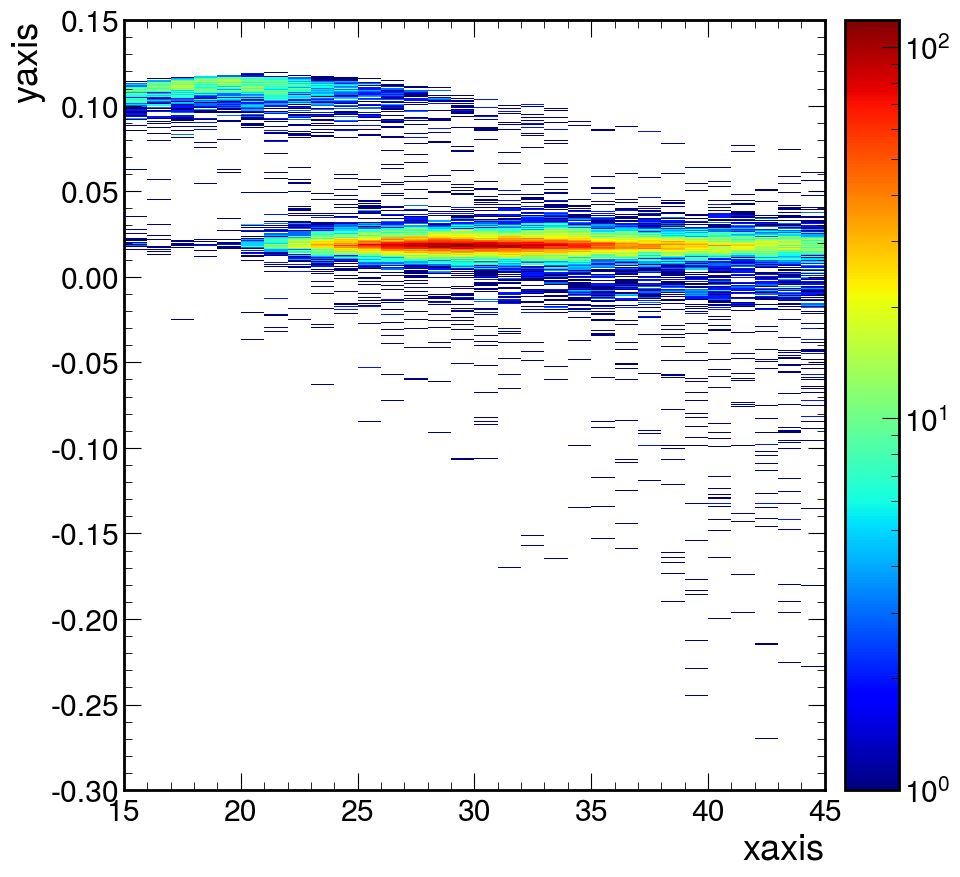

In [9]:
h5["sampleC_TMVA_mm2_vs_p"][15j:45j, :].plot(cmap="jet", norm=LogNorm())

In [5]:
print(f'Signal Region 1 TMVA: {h5["sampleC_TMVA_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 TMVA: {h5["sampleC_TMVA_region"].values()[regions["sr2"]]}')

Signal Region 1 TMVA: 434.0
Signal Region 2 TMVA: 1198.0


In [38]:
print(f'Signal Region 1 TMVA (No GTK veto): {h5["sampleCNoGTK_BDT_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 TMVA (No GTK veto): {h5["sampleCNoGTK_BDT_region"].values()[regions["sr2"]]}')

Signal Region 1 TMVA (No GTK veto): 6.0
Signal Region 2 TMVA (No GTK veto): 41.0


In [28]:
#print(f'Signal Region 1 BDT (Kaon4): {h["sampleC_BDT_region"].values()[regions["sr1"]]}')
#print(f'Signal Region 1 BDT (Kaon4): {h["sampleC_BDT_region"].values()[regions["sr2"]]}')

Signal Region 1 BDT (Kaon4): 7.0
Signal Region 1 BDT (Kaon4): 40.0


In [28]:
#print(f'Signal Region 1 BDT (Kaon4, No GTK Veto): {h["sampleCNoGTK_BDT_region"].values()[regions["sr1"]]}')
#print(f'Signal Region 1 BDT (Kaon4, No GTK Veto): {h["sampleCNoGTK_BDT_region"].values()[regions["sr2"]]}')

Signal Region 1 BDT (Kaon4, No GTK Veto): 7.0
Signal Region 1 BDT (Kaon4, No GTK Veto): 41.0


In [29]:
print(f'Signal Region 1 BDT (Kaon5): {h5["sampleC_BDT_region"].values()[regions["sr1"]]}')
print(f'Signal Region 1 BDT (Kaon5): {h5["sampleC_BDT_region"].values()[regions["sr2"]]}')

Signal Region 1 BDT (Kaon5): 4.0
Signal Region 1 BDT (Kaon5): 27.0


In [31]:
print(f'Signal Region 1 BDT (Kaon5, No GTK Veto): {h5["sampleCNoGTK_BDT_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 BDT (Kaon5, No GTK Veto): {h5["sampleCNoGTK_BDT_region"].values()[regions["sr2"]]}')

Signal Region 1 BDT (Kaon5, No GTK Veto): 6.0
Signal Region 2 BDT (Kaon5, No GTK Veto): 41.0


# Standard Background Regions

In [32]:
#print(f'K3pi Region TMVA: {h["Bkg_TMVA_region"].values()[regions["k3pi"]]}')
#print(f'K2pi Region TMVA: {h["Bkg_TMVA_region"].values()[regions["k2pi"]]}')
#print(f'K2pi Region TMVA: {h["Bkg_TMVA_region"].values()[regions["kmu2"]]}\n')

#print(f'K3pi Region TMVA (No GTK): {h["BkgNoGTK_TMVA_region"].values()[regions["k3pi"]]}')
#print(f'K2pi Region TMVA (No GTK): {h["BkgNoGTK_TMVA_region"].values()[regions["k2pi"]]}')
#print(f'K2pi Region TMVA (No GTK): {h["BkgNoGTK_TMVA_region"].values()[regions["kmu2"]]}\n')

#print(f'K3pi Region BDT (Kaon4): {h["Bkg_BDT_region"].values()[regions["k3pi"]]}')
#print(f'K2pi Region BDT (Kaon4): {h["Bkg_BDT_region"].values()[regions["k2pi"]]}')
#print(f'K2pi Region BDT (Kaon4): {h["Bkg_BDT_region"].values()[regions["kmu2"]]}\n')

print(f'K3pi Region BDT (No BB): {h5["Bkg_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region BDT (No BB): {h5["Bkg_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region BDT (No BB): {h5["Bkg_region"].values()[regions["kmu2"]]}\n')

print(f'K3pi Region BDT (TMVA): {h5["Bkg_TMVA_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region BDT (TMVA): {h5["Bkg_TMVA_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region BDT (TMVA): {h5["Bkg_TMVA_region"].values()[regions["kmu2"]]}\n')

print(f'K3pi Region BDT (Kaon5): {h5["Bkg_BDT_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region BDT (Kaon5): {h5["Bkg_BDT_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region BDT (Kaon5): {h5["Bkg_BDT_region"].values()[regions["kmu2"]]}\n')

print(f'K3pi Region BDT (Kaon5, No GTK): {h5["BkgNoGTK_BDT_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region BDT (Kaon5, No GTK): {h5["BkgNoGTK_BDT_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region BDT (Kaon5, No GTK): {h5["BkgNoGTK_BDT_region"].values()[regions["kmu2"]]}')

K3pi Region BDT (No BB): 28427.0
K2pi Region BDT (No BB): 3995.0
Kmu2 Region BDT (No BB): 12336.0

K3pi Region BDT (TMVA): 23321.0
K2pi Region BDT (TMVA): 3638.0
Kmu2 Region BDT (TMVA): 10726.0

K3pi Region BDT (Kaon5): 22789.0
K2pi Region BDT (Kaon5): 3420.0
Kmu2 Region BDT (Kaon5): 10595.0

K3pi Region BDT (Kaon5, No GTK): 22795.0
K2pi Region BDT (Kaon5, No GTK): 3481.0
Kmu2 Region BDT (Kaon5, No GTK): 10694.0


# Ke4 Noov

In [40]:
h = {}
with up.open("./data/fwEvals/Ke4Noov_sampleC_and_Bkg_Eval_Kaon4.root:PNNAnalysis") as f:
    for k in f.keys():
        h[k.replace(";1","")] = f[k].to_hist()

h5 = {}
with up.open("./data/fwEvals/Ke4Noov_sampleC_and_Bkg_Eval_Kaon5.root:PNNAnalysis") as f:
    for k in f.keys():
        h5[k.replace(";1","")] = f[k].to_hist()

In [51]:
print(f'K3pi Region TMVA: {h["Bkg_TMVA_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region TMVA: {h["Bkg_TMVA_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region TMVA: {h["Bkg_TMVA_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 TMVA: {h["Sig_TMVA_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 TMVA: {h["Sig_TMVA_region"].values()[regions["sr2"]]}\n')

print(f'K3pi Region TMVA (No GTK): {h["BkgNoGTK_TMVA_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region TMVA (No GTK): {h["BkgNoGTK_TMVA_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region TMVA (No GTK): {h["BkgNoGTK_TMVA_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 TMVA (No GTK): {h["SigNoGTK_TMVA_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 TMVA (No GTK): {h["SigNoGTK_TMVA_region"].values()[regions["sr2"]]}\n')

print(f'K3pi Region BDT (Kaon4): {h["Bkg_BDT_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region BDT (Kaon4): {h["Bkg_BDT_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region BDT (Kaon4): {h["Bkg_BDT_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 BDT (Kaon4): {h["Sig_BDT_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 BDT (Kaon4): {h["Sig_BDT_region"].values()[regions["sr2"]]}\n')

print(f'K3pi Region BDT (Kaon5): {h5["Bkg_BDT_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region BDT (Kaon5): {h5["Bkg_BDT_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region BDT (Kaon5): {h5["Bkg_BDT_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 BDT (Kaon5): {h5["Sig_BDT_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 BDT (Kaon5): {h5["Sig_BDT_region"].values()[regions["sr2"]]}\n')

print(f'K3pi Region BDT (Kaon5, No GTK): {h5["BkgNoGTK_BDT_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region BDT (Kaon5, No GTK): {h5["BkgNoGTK_BDT_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region BDT (Kaon5, No GTK): {h5["BkgNoGTK_BDT_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 TMVA: {h5["SigNoGTK_BDT_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 TMVA: {h5["SigNoGTK_BDT_region"].values()[regions["sr2"]]}\n')

K3pi Region TMVA: 53.0
K2pi Region TMVA: 0.0
Kmu2 Region TMVA: 0.0
Signal Region 1 TMVA: 0.0
Signal Region 2 TMVA: 20.0

K3pi Region TMVA (No GTK): 53.0
K2pi Region TMVA (No GTK): 0.0
Kmu2 Region TMVA (No GTK): 0.0
Signal Region 1 TMVA (No GTK): 0.0
Signal Region 2 TMVA (No GTK): 20.0

K3pi Region BDT (Kaon4): 55.0
K2pi Region BDT (Kaon4): 0.0
Kmu2 Region BDT (Kaon4): 0.0
Signal Region 1 BDT (Kaon4): 0.0
Signal Region 2 BDT (Kaon4): 21.0

K3pi Region BDT (Kaon5): 57.0
K2pi Region BDT (Kaon5): 0.0
Kmu2 Region BDT (Kaon5): 0.0
Signal Region 1 BDT (Kaon5): 0.0
Signal Region 2 BDT (Kaon5): 21.0

K3pi Region BDT (Kaon5, No GTK): 57.0
K2pi Region BDT (Kaon5, No GTK): 0.0
Kmu2 Region BDT (Kaon5, No GTK): 0.0
Signal Region 1 TMVA: 0.0
Signal Region 2 TMVA: 21.0



## Signal Acceptances (Noov)

In [40]:
h5 = {}
with up.open("./data/NewFW/kpinn_12_11_noov_upstream_kaon5_new.root:PNNAnalysis") as f:
    for k in f.keys():
        h5[k.replace(";1","")] = f[k].to_hist()

#h = {}
#with up.open("./data/fwEvals/KpinnNoov_sampleC_Bkg_Sig_Eval_Kaon5.root:PNNAnalysis") as f:
#    for k in f.keys():
#        h[k.replace(";1","")] = f[k].to_hist()

In [43]:
n1 = h5["Sig_TMVA_region"].values()[regions["sr1"]]
n2 = h5["Sig_TMVA_region"].values()[regions["sr2"]]
print(f'Signal Region 1 TMVA (w/ GTK hits veto): {n1}')
print(f'Signal Region 2 TMVA (w/ GTK hits veto): {n2}')
print(f"Total = {n1 + n2}")

Signal Region 1 TMVA (w/ GTK hits veto): 192584.0
Signal Region 2 TMVA (w/ GTK hits veto): 1062245.0
Total = 1254829.0


In [44]:
n1 = h5["Sig_region"].values()[regions["sr1"]]
n2 = h5["Sig_region"].values()[regions["sr2"]]
print(f'Signal Region 1 (No Upstream Veto): {n1}')
print(f'Signal Region 2 (No Upstream Veto): {n2}')
print(f"Total = {n1 + n2}")

Signal Region 1 (No Upstream Veto): 214562.0
Signal Region 2 (No Upstream Veto): 1295815.0
Total = 1510377.0


In [46]:
n1 = h5["SigNoGTK_BDT_region"].values()[regions["sr1"]]
n2 = h5["SigNoGTK_BDT_region"].values()[regions["sr2"]]
print(f'Signal Region 1 Kaon5 (No GTK hits veto): {n1}')
print(f'Signal Region 2 Kaon5 (No GTK hits veto): {n2}')
print(f"Total = {n1 + n2}")

Signal Region 1 Kaon5 (No GTK hits veto): 208068.0
Signal Region 2 Kaon5 (No GTK hits veto): 1173592.0
Total = 1381660.0


In [7]:
print(f'Signal Region 1 Kaon5 (With GTK hits veto): {h5["Sig_TMVA_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 Kaon5 (With GTK hits veto): {h5["Sig_TMVA_region"].values()[regions["sr2"]]}')

Signal Region 1 Kaon5 (With GTK hits veto): 185008.0
Signal Region 2 Kaon5 (With GTK hits veto): 981580.0


# Signal Overlaid

In [19]:
#with up.open("./data/fwEvals/KpinnOvl_sampleC_Bkg_Sig_Eval_Kaon4.root:PNNAnalysis") as f:
#    h = {}
#    for k in f.keys():
#        h[k.replace(";1","")] = f[k].to_hist()

h5 = {}
with up.open("./data/NewFW/kpinn_12_11_overlaid_upstream_kaon5_new.root:PNNAnalysis") as f:
    for k in f.keys():
        h5[k.replace(";1","")] = f[k].to_hist()

In [20]:
print(f'K3pi Region TMVA: {h["Bkg_TMVA_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region TMVA: {h["Bkg_TMVA_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region TMVA: {h["Bkg_TMVA_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 TMVA: {h["Sig_TMVA_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 TMVA: {h["Sig_TMVA_region"].values()[regions["sr2"]]}')
print(f'Signal Regions TMVA: {h["Sig_TMVA_region"].values()[regions["sr2"]] + h["Sig_TMVA_region"].values()[regions["sr1"]]}\n')

print(f'K3pi Region TMVA (No GTK): {h["BkgNoGTK_TMVA_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region TMVA (No GTK): {h["BkgNoGTK_TMVA_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region TMVA (No GTK): {h["BkgNoGTK_TMVA_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 TMVA (No GTK): {h["SigNoGTK_TMVA_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 TMVA (No GTK): {h["SigNoGTK_TMVA_region"].values()[regions["sr2"]]}')
print(f'Signal Regions TMVA (No GTK): {h["SigNoGTK_TMVA_region"].values()[regions["sr2"]] + h["SigNoGTK_TMVA_region"].values()[regions["sr1"]]} \n')

print(f'K3pi Region BDT (Kaon4): {h["Bkg_BDT_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region BDT (Kaon4): {h["Bkg_BDT_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region BDT (Kaon4): {h["Bkg_BDT_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 BDT (Kaon4): {h["Sig_BDT_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 BDT (Kaon4): {h["Sig_BDT_region"].values()[regions["sr2"]]}')
print(f'Signal Regions BDT (Kaon4): {h["Sig_BDT_region"].values()[regions["sr1"]] + h["Sig_BDT_region"].values()[regions["sr2"]]}\n')

print(f'K3pi Region BDT (Kaon5): {h5["Bkg_BDT_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region BDT (Kaon5): {h5["Bkg_BDT_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region BDT (Kaon5): {h5["Bkg_BDT_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 BDT (Kaon5): {h5["Sig_BDT_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 BDT (Kaon5): {h5["Sig_BDT_region"].values()[regions["sr2"]]}')
print(f'Signal Regions BDT (Kaon5): {h5["Sig_BDT_region"].values()[regions["sr2"]] + h5["Sig_BDT_region"].values()[regions["sr1"]]}\n')

print(f'K3pi Region BDT (Kaon5, No GTK): {h5["BkgNoGTK_BDT_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region BDT (Kaon5, No GTK): {h5["BkgNoGTK_BDT_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region BDT (Kaon5, No GTK): {h5["BkgNoGTK_BDT_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 (Kaon5, No GTK): {h5["SigNoGTK_BDT_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 (Kaon5, No GTK): {h5["SigNoGTK_BDT_region"].values()[regions["sr2"]]}')
print(f'Signal Regions (Kaon5, No GTK): {h5["SigNoGTK_BDT_region"].values()[regions["sr2"]] + h5["SigNoGTK_BDT_region"].values()[regions["sr1"]]}\n')

K3pi Region TMVA: 18891.0
K2pi Region TMVA: 3155.0
Kmu2 Region TMVA: 8638.0
Signal Region 1 TMVA: 0.0
Signal Region 2 TMVA: 0.0
Signal Regions TMVA: 0.0

K3pi Region TMVA (No GTK): 18942.0
K2pi Region TMVA (No GTK): 3165.0
Kmu2 Region TMVA (No GTK): 8653.0
Signal Region 1 TMVA (No GTK): 0.0
Signal Region 2 TMVA (No GTK): 0.0
Signal Regions TMVA (No GTK): 0.0 

K3pi Region BDT (Kaon4): 17922.0
K2pi Region BDT (Kaon4): 2930.0
Kmu2 Region BDT (Kaon4): 8530.0
Signal Region 1 BDT (Kaon4): 0.0
Signal Region 2 BDT (Kaon4): 0.0
Signal Regions BDT (Kaon4): 0.0

K3pi Region BDT (Kaon5): 83193.0
K2pi Region BDT (Kaon5): 73305.0
Kmu2 Region BDT (Kaon5): 198.0
Signal Region 1 BDT (Kaon5): 60522.0
Signal Region 2 BDT (Kaon5): 339900.0
Signal Regions BDT (Kaon5): 400422.0

K3pi Region BDT (Kaon5, No GTK): 83195.0
K2pi Region BDT (Kaon5, No GTK): 74876.0
Kmu2 Region BDT (Kaon5, No GTK): 198.0
Signal Region 1 (Kaon5, No GTK): 62241.0
Signal Region 2 (Kaon5, No GTK): 345250.0
Signal Regions (Kaon5, No G

In [24]:
h5["Sig_region"].values()[regions['sr1']] + h5["Sig_region"].values()[regions['sr2']]

447881.0

In [ ]:
print(f'K3pi Region TMVA: {h["Bkg_TMVA_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region TMVA: {h["Bkg_TMVA_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region TMVA: {h["Bkg_TMVA_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 TMVA: {h["Sig_TMVA_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 TMVA: {h["Sig_TMVA_region"].values()[regions["sr2"]]}')
print(f'Signal Regions TMVA: {h["Sig_TMVA_region"].values()[regions["sr2"]] + h["Sig_TMVA_region"].values()[regions["sr1"]]}\n')

print(f'K3pi Region TMVA (No GTK): {h["BkgNoGTK_TMVA_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region TMVA (No GTK): {h["BkgNoGTK_TMVA_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region TMVA (No GTK): {h["BkgNoGTK_TMVA_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 TMVA (No GTK): {h["SigNoGTK_TMVA_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 TMVA (No GTK): {h["SigNoGTK_TMVA_region"].values()[regions["sr2"]]}')
print(f'Signal Regions TMVA (No GTK): {h["SigNoGTK_TMVA_region"].values()[regions["sr2"]] + h["SigNoGTK_TMVA_region"].values()[regions["sr1"]]} \n')

print(f'K3pi Region BDT (Kaon4): {h["Bkg_BDT_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region BDT (Kaon4): {h["Bkg_BDT_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region BDT (Kaon4): {h["Bkg_BDT_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 BDT (Kaon4): {h["Sig_BDT_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 BDT (Kaon4): {h["Sig_BDT_region"].values()[regions["sr2"]]}')
print(f'Signal Regions BDT (Kaon4): {h["Sig_BDT_region"].values()[regions["sr1"]] + h["Sig_BDT_region"].values()[regions["sr2"]]}\n')

print(f'K3pi Region BDT (Kaon5): {h5["Bkg_BDT_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region BDT (Kaon5): {h5["Bkg_BDT_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region BDT (Kaon5): {h5["Bkg_BDT_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 BDT (Kaon5): {h5["Sig_BDT_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 BDT (Kaon5): {h5["Sig_BDT_region"].values()[regions["sr2"]]}')
print(f'Signal Regions BDT (Kaon5): {h5["Sig_BDT_region"].values()[regions["sr2"]] + h5["Sig_BDT_region"].values()[regions["sr1"]]}\n')

print(f'K3pi Region BDT (Kaon5, No GTK): {h5["BkgNoGTK_BDT_region"].values()[regions["k3pi"]]}')
print(f'K2pi Region BDT (Kaon5, No GTK): {h5["BkgNoGTK_BDT_region"].values()[regions["k2pi"]]}')
print(f'Kmu2 Region BDT (Kaon5, No GTK): {h5["BkgNoGTK_BDT_region"].values()[regions["kmu2"]]}')
print(f'Signal Region 1 (Kaon5, No GTK): {h5["SigNoGTK_BDT_region"].values()[regions["sr1"]]}')
print(f'Signal Region 2 (Kaon5, No GTK): {h5["SigNoGTK_BDT_region"].values()[regions["sr2"]]}')
print(f'Signal Regions (Kaon5, No GTK): {h5["SigNoGTK_BDT_region"].values()[regions["sr2"]] + h5["SigNoGTK_BDT_region"].values()[regions["sr1"]]}\n')

K3pi Region TMVA: 18891.0
K2pi Region TMVA: 3155.0
Kmu2 Region TMVA: 8638.0
Signal Region 1 TMVA: 0.0
Signal Region 2 TMVA: 0.0
Signal Regions TMVA: 0.0

K3pi Region TMVA (No GTK): 18942.0
K2pi Region TMVA (No GTK): 3165.0
Kmu2 Region TMVA (No GTK): 8653.0
Signal Region 1 TMVA (No GTK): 0.0
Signal Region 2 TMVA (No GTK): 0.0
Signal Regions TMVA (No GTK): 0.0 

K3pi Region BDT (Kaon4): 17922.0
K2pi Region BDT (Kaon4): 2930.0
Kmu2 Region BDT (Kaon4): 8530.0
Signal Region 1 BDT (Kaon4): 0.0
Signal Region 2 BDT (Kaon4): 0.0
Signal Regions BDT (Kaon4): 0.0

K3pi Region BDT (Kaon5): 83193.0
K2pi Region BDT (Kaon5): 73305.0
Kmu2 Region BDT (Kaon5): 198.0
Signal Region 1 BDT (Kaon5): 60522.0
Signal Region 2 BDT (Kaon5): 339900.0
Signal Regions BDT (Kaon5): 400422.0

K3pi Region BDT (Kaon5, No GTK): 83195.0
K2pi Region BDT (Kaon5, No GTK): 74876.0
Kmu2 Region BDT (Kaon5, No GTK): 198.0
Signal Region 1 (Kaon5, No GTK): 62241.0
Signal Region 2 (Kaon5, No GTK): 345250.0
Signal Regions (Kaon5, No G